# Classification. Linear models and KNN

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector

## Part 1: Titanic survival prediction

### Dataset

Read the description here: https://www.kaggle.com/c/titanic/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/titanic/overview/evaluation.  


In [3]:
PATH = "data/"

In [4]:
data = pd.read_csv(os.path.join(PATH, 'Titanic', 'train.csv'))
test = pd.read_csv(os.path.join(PATH, 'Titanic', 'test.csv'))
all_data = data.append(test)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [6]:
males_number = len(data[data['Sex']=='male'])
females_number = len(data[data['Sex'] == 'female'])
survived_males_number = len(data[(data['Sex']=='male') & (data['Survived'] == 1)])
survived_females_number = len(data[(data['Sex']=='female') & (data['Survived'] == 1)])

In [7]:
print('Male number: ', males_number)
print('Female number: ', females_number)
print('Survived male:', survived_males_number)
print('Survived female:', survived_females_number)
print('Percent of survived male: ', round(survived_males_number / males_number * 100,2), '%')
print('Percent of survived male: ', round(survived_females_number / females_number * 100,2), '%')


Male number:  577
Female number:  314
Survived male: 109
Survived female: 233
Percent of survived male:  18.89 %
Percent of survived male:  74.2 %


Видим, что мужчин на борту больше, а так же, что процент выживших мужчин гораздо меньше, чем проценты выживших женщин

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

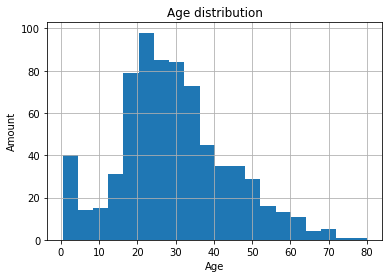

In [8]:
data.hist(column='Age', bins=20)
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Age distribution')
None

In [9]:
print('Median age of survived peoples: ', data[data['Survived'] == 1]['Age'].median())
print('Mean age of survived peoples: ',data[data['Survived'] == 1]['Age'].mean())

Median age of survived peoples:  28.0
Mean age of survived peoples:  28.343689655172415


По графику распределения видно, что данные распределены нормально

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

In [10]:
grouped_by_pclass_and_embarked = data.groupby(['Pclass','Embarked'])['Survived'].sum()

In [11]:
grouped_by_pclass = data.groupby('Pclass')['Survived'].sum()

In [12]:
grouped_by_embarked = data.groupby('Embarked')['Survived'].sum()

In [13]:
s_embarked = len(data[data['Embarked'] == 'S'])
q_embarked = len(data[data['Embarked'] == 'Q'])
c_embarked = len(data[data['Embarked'] == 'C'])

In [14]:
print('Number of passengers embarked in S port: ', s_embarked)
print('Number of passengers embarked in Q port: ', q_embarked)
print('Number of passengers embarked in C port: ', c_embarked)

Number of passengers embarked in S port:  644
Number of passengers embarked in Q port:  77
Number of passengers embarked in C port:  168


/home/sh4dowauthor/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


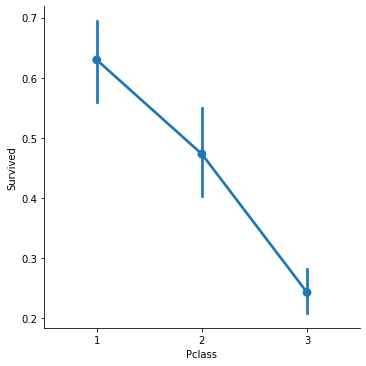

In [15]:
sns.factorplot(x='Pclass', y = 'Survived', data=data)

/home/sh4dowauthor/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


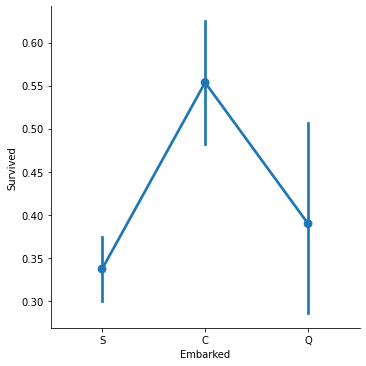

In [16]:
sns.factorplot(x='Embarked', y = 'Survived', data=data)

/home/sh4dowauthor/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


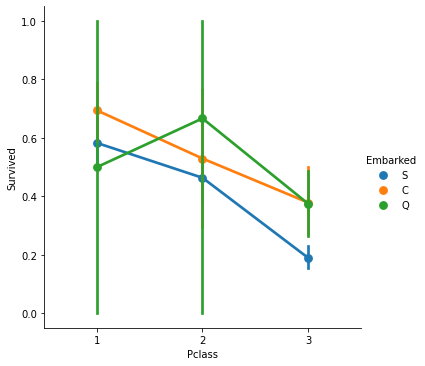

In [17]:
sns.factorplot(x='Pclass', y = 'Survived', hue= 'Embarked', data=data)

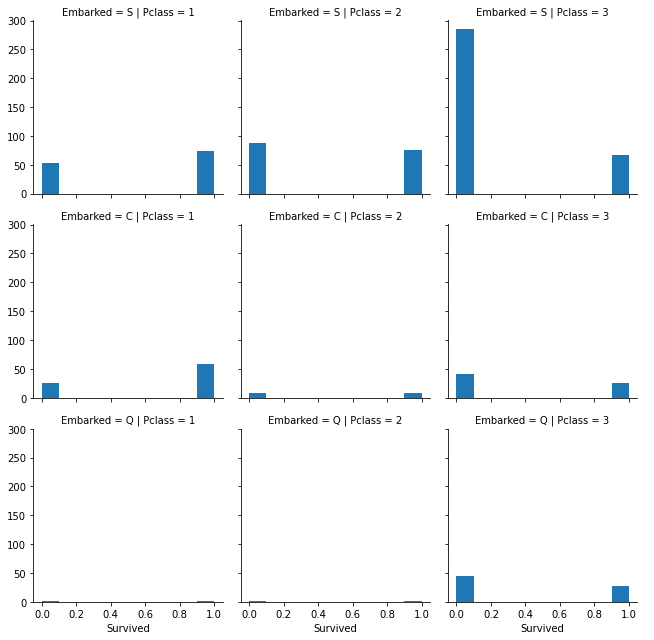

In [18]:
g = sns.FacetGrid(data, col='Pclass', row='Embarked')
g = g.map(plt.hist,'Survived').add_legend();

Видно, что Embarked=Q|Pclass=1 , Embarked=Q|Pclass=2, Embarked=C|Pclass=2 и Embarked=C|Pclass=1, но кол-во выживших примерно равно. Выделяется лишь Embarked=S|Pclass=3, где кол-во выживших гораздо ниже, чем кол-во не выживших.

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [19]:
data.isna().sum() / len(data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

Age мы заполним медианным возрастом в зависимости от "титула" человека(титул мы возьмём из его имени), так как сведений о кабинах отсутствует слишком + скор с фичей наличия кабин хуже, просто выбросим данную фичу.

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [20]:
all_data['Title'] = all_data['Name']

In [21]:
# Достаём титул из имени при помощи регулярки, т.к. титулов получается слишком много сведём эти титулы к нескольким
for name_string in all_data['Name']:
    all_data['Title'] = all_data['Name'].str.extract('([A-Za-z]+)\.', expand=True)

    mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
all_data.replace({'Title': mapping}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
# Заполним значения недостающих возрастов медианным по титулу
for title in titles:
        age_to_inp = all_data.groupby('Title')['Age'].median()[titles.index(title)]
        all_data.loc[(all_data['Age'].isna()) & (all_data['Title'] == title), 'Age'] = age_to_inp

data['Age'] = all_data['Age'][:891]
test['Age'] = all_data['Age'][891:]
all_data.drop(columns='Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S


In [22]:
# Закодируем пол
data['Sex'].replace(['male','female'],[0,1],inplace=True)
test['Sex'].replace(['male','female'],[0,1],inplace=True)

In [23]:
# Сгенерируем фичу FamilySize используя сумму кол-ва братьев/сестёр/супругов и кол-ва детей/родителей
all_data.loc[:, 'FamilySize'] = all_data['SibSp'] + all_data['Parch']
data['FamilySize'] = all_data['FamilySize'][:891]
test['FamilySize'] = all_data['FamilySize'][891:]

In [24]:
# Заполним недостающий значения Fare(они есть в test) медианным значением, разобьём эти значения на интервалы 
# и закодируем при помощи LabelEncoder'a, после этого удалим фичу Fare, т.к. она нам не нужна из-за высокой 
# скореллированности с FareBin, что может привести к проклятию размерности для KNN
all_data['Fare'].fillna(all_data['Fare'].median(), inplace=True)
all_data['FareBin'] = pd.qcut(all_data['Fare'], 5)

label_enc = LabelEncoder()
all_data['FareBin_Code'] = label_enc.fit_transform(all_data['FareBin'])

data['FareBin_Code'] = all_data['FareBin_Code'][:891]
test['FareBin_Code'] = all_data['FareBin_Code'][891:]

data.drop(columns=['Fare'], inplace=True)
test.drop(columns=['Fare'], inplace=True)

In [25]:
# Точно то же самое сделаем и с Age
all_data['AgeBin'] = pd.qcut(all_data['Age'], 4)
label_enc = LabelEncoder()
all_data['AgeBin_Code'] = label_enc.fit_transform(all_data['AgeBin'])

data['AgeBin_Code'] = all_data['AgeBin_Code'][:891]
test['AgeBin_Code'] = all_data['AgeBin_Code'][891:]

data.drop(columns=['Age'], inplace=True)
test.drop(columns=['Age'], inplace=True)

In [26]:
data.drop(columns=['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked'], inplace = True)
test.drop(columns=['Name','PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
              'Embarked'], inplace = True)

In [27]:
data.head()

,Survived,Pclass,Sex,FamilySize,FareBin_Code,AgeBin_Code
0,0,3,0,1,0,0
1,1,1,1,1,4,3
2,1,3,1,0,1,1
3,1,1,1,1,4,2
4,0,3,0,0,1,2


**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

Load the test set and make the predictions. Submit them to kaggle and see the results :)
Select the best model, load the test set and make the predictions. Submit them to kaggle.

**Note**. X points will depend on your kaggle leaderboard score.
$$ f(score) = 0.5, \ \ 0.76 \leq score < 0.78,$$
$$ f(score) = 1.0, \ \ 0.78 \leq score < 0.81,$$ 
$$ f(score) = 2.5, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

In [28]:
all_data['Last_Name'] = all_data['Name'].apply(lambda x: str.split(x, ",")[0])
all_data['Fare'].fillna(all_data['Fare'].mean(), inplace=True)

DEFAULT_SURVIVAL_VALUE = 0.5
all_data['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in all_data[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    if (len(grp_df) != 1):
        # Если найдена группа, где несколько людей с одинаковой фамилией плывут по одному тарифу
        for ind, row in grp_df.iterrows():
            # Присвоим фиче Family_survival 1, если хотя бы кто-нибудь из семьи выжил, если есть значения 0 и 
            # нет ни одного значения 1, присваиваем 0, иначе оставляем 0.5 
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                all_data.loc[all_data['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                all_data.loc[all_data['PassengerId'] == passID, 'Family_Survival'] = 0
            

In [29]:
for _, grp_df in all_data.groupby('Ticket'):
    # Проделаем всё то же самое сгрупировав по Ticket'у, только в данном случае мы будем не будем 
    # взаимодействовать с строками, в которых уже можно сказать, что выжившие члены семьи есть
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival'] == 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    all_data.loc[all_data['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    all_data.loc[all_data['PassengerId'] == passID, 'Family_Survival'] = 0
                        

data['Family_Survival'] = all_data['Family_Survival'][:891]
test['Family_Survival'] = all_data['Family_Survival'][891:]

In [30]:
X = data.drop('Survived', 1)
y = data['Survived']
X_test = test.copy()

In [31]:
X

,Pclass,Sex,FamilySize,FareBin_Code,AgeBin_Code,Family_Survival
0,3,0,1,0,0,0.5
1,1,1,1,4,3,0.5
2,3,1,0,1,1,0.5
3,1,1,1,4,2,0.0
4,3,0,0,1,2,0.5
...,...,...,...,...,...,...
886,2,0,0,2,1,0.5
887,1,1,0,3,0,0.5
888,3,1,3,3,0,0.0
889,1,0,0,3,1,0.5


In [32]:
# Скалируем данные
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

In [33]:
# При помощи grid_search находим лучшие параметры, замечу, что grid_search использует **кросс валидациию**
n_neighbors = [6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}
model = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = 'accuracy')
model.fit(X, y)
print(model.best_score_)
print(model.best_estimator_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
0.8462421972534333
KNeighborsClassifier(leaf_size=1, n_neighbors=22)


In [34]:
model.best_estimator_.fit(X, y)
y_pred = model.predict(X_test)

In [35]:
C = np.logspace(-3,3,7)
penalty = ['l1', 'l2']
hyperparams = {'C': C, 'penalty':penalty}
model_log = GridSearchCV(estimator=LogisticRegression(), param_grid=hyperparams, verbose=True, cv=5, 
                     scoring='accuracy')
model_log.fit(X, y)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


/home/sh4dowauthor/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/sh4dowauthor/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sh4dowauthor/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/sh4dowauthor/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/sh4dowa

/home/sh4dowauthor/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/sh4dowauthor/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sh4dowauthor/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/sh4dowauthor/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/sh4dowa

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=True)

In [36]:
print(model_log.best_score_)
print(model_log.best_params_)

0.8305316678174629
{'C': 1.0, 'penalty': 'l2'}


In [37]:
temp = pd.DataFrame(all_data[891:]['PassengerId'].tolist(),columns=['PassengerId'])
temp['Survived'] = y_pred.astype(int)
temp.to_csv('data/submission.csv', index = False)

In [38]:
temp

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [39]:
d = pd.read_csv('data/submission.csv')

In [40]:
d

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


file:///home/sh4dowauthor/Pictures/Screenshot%20from%202021-03-01%2010-22-55.png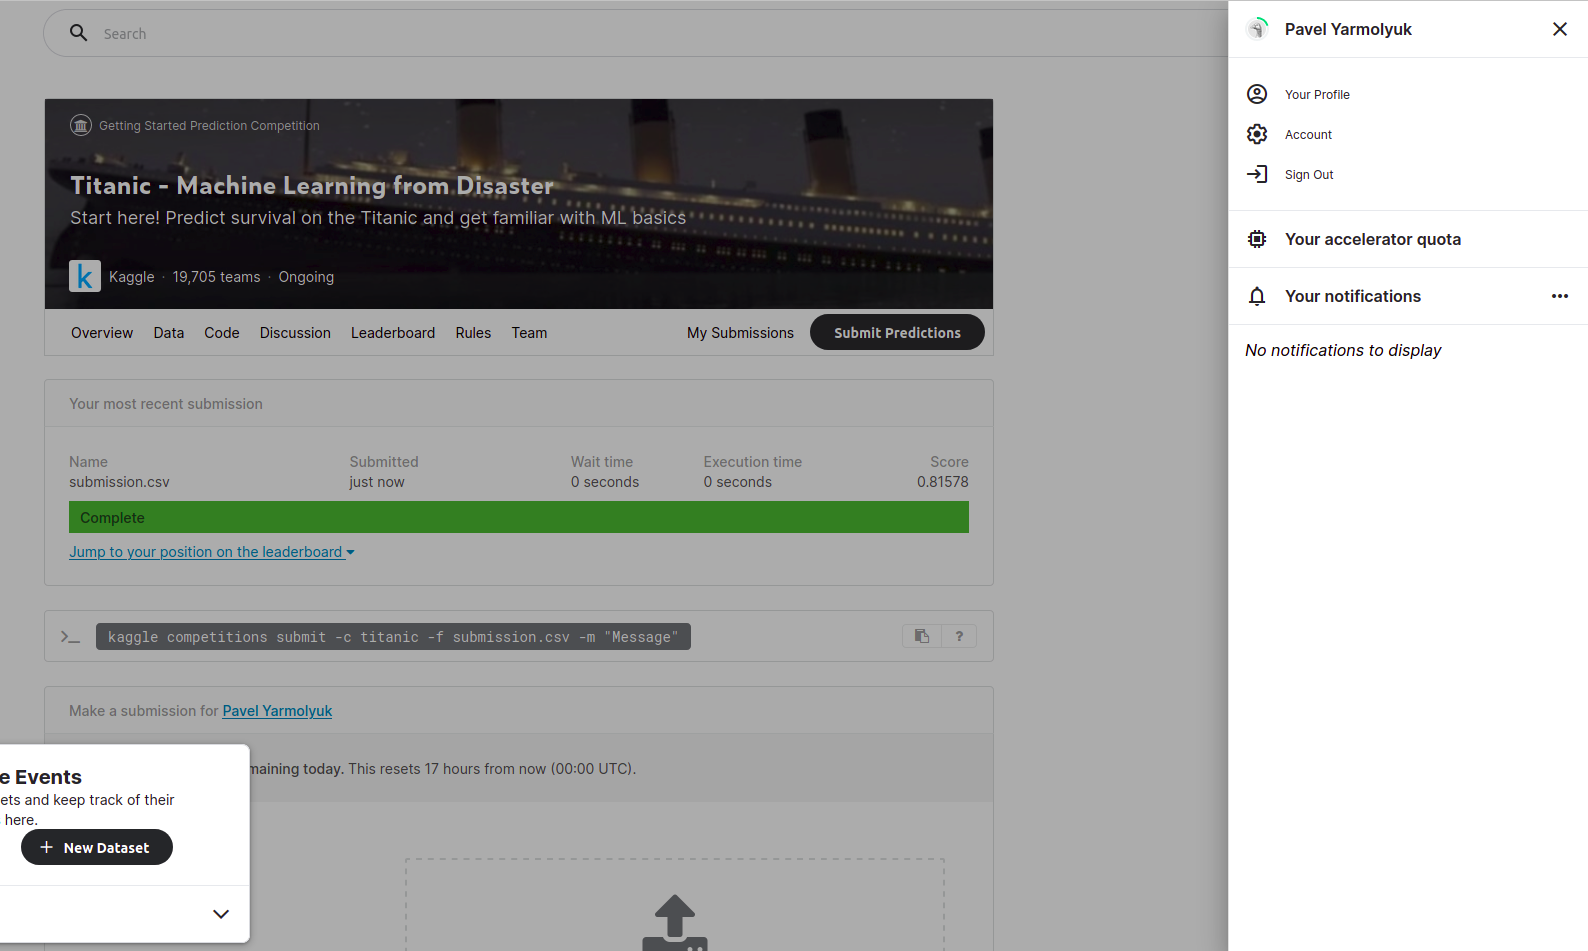